In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# DATA PREPROCESSING

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
data=pd.read_csv("/content/Salary Data (2).csv")
data.head()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0


finding the number of instances in dataset

In [ ]:
data.shape

(375, 6)

Finding the number of unique jobs

In [ ]:
unique_jobs = data['Job Title'].nunique()
print(unique_jobs)

174


catagorical attributes in dataset

In [ ]:
categorical = data.loc[:,['Gender', 'Education Level', 'Job Title']]
categorical.head()

,Gender,Education Level,Job Title
0,Male,Bachelor's,Software Engineer
1,Female,Master's,Data Analyst
2,Male,PhD,Senior Manager
3,Female,Bachelor's,Sales Associate
4,Male,Master's,Director


numerical attributes in dataset

In [ ]:
numerical = data.loc[:, ['Age', 'Years of Experience', 'Salary']]
numerical.head()

,Age,Years of Experience,Salary
0,32.0,5.0,90000.0
1,28.0,3.0,65000.0
2,45.0,15.0,150000.0
3,36.0,7.0,60000.0
4,52.0,20.0,200000.0


finding null values in dataset

In [ ]:
data.isnull().sum()

Age                    2
Gender                 2
Education Level        2
Job Title              2
Years of Experience    2
Salary                 2
dtype: int64

removing the null values

In [ ]:
new_data = data.copy()
new_data.dropna(axis = 0, inplace = True)
new_data.isnull().sum()

Age                    0
Gender                 0
Education Level        0
Job Title              0
Years of Experience    0
Salary                 0
dtype: int64

data transformation,
converting catagorical values into numeric fields as linear regression models are trained on numeric data

In [ ]:
gender = pd.get_dummies(new_data['Gender'])
new_data = pd.concat([new_data, gender], axis = 1)
new_data.drop(columns = ['Gender'], inplace = True)
"""
one hot encoding is used to convert gender into male and female attributes and having boolean values
"""


'\none hot encoding is used to convert gender into male and female attributes and having boolean values\n'

In [ ]:
education = pd.get_dummies(new_data['Education Level'])
new_data = pd.concat([new_data, education], axis = 1)
new_data.drop(columns = ['Education Level'], inplace = True)

"""
one hot encoding is used to convert education level into masters , bachelors and phd  attributes and having boolean values
"""


'\none hot encoding is used to convert education level into masters , bachelors and phd  attributes and having boolean values\n'

In [ ]:
import joblib
from sklearn.preprocessing import LabelEncoder
from google.colab import files
label_encoder=LabelEncoder()
new_data['Job Title'] = label_encoder.fit_transform(new_data['Job Title'])
joblib.dump(label_encoder,"label_encoder.pkl")
files.download("label_encoder.pkl")

"""
using the LabelEncoder from scikit-learn to encode the Job Title column in the DataFrame new_data. The LabelEncoder is used to convert categorical labels (text values) into numerical values
"""

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

'\nusing the LabelEncoder from scikit-learn to encode the Job Title column in the DataFrame new_data. The LabelEncoder is used to convert categorical labels (text values) into numerical values\n'

In [ ]:
label_encoder.classes_

array(['Account Manager', 'Accountant', 'Administrative Assistant',
       'Business Analyst', 'Business Development Manager',
       'Business Intelligence Analyst', 'CEO', 'Chief Data Officer',
       'Chief Technology Officer', 'Content Marketing Manager',
       'Copywriter', 'Creative Director', 'Customer Service Manager',
       'Customer Service Rep', 'Customer Service Representative',
       'Customer Success Manager', 'Customer Success Rep', 'Data Analyst',
       'Data Entry Clerk', 'Data Scientist', 'Digital Content Producer',
       'Digital Marketing Manager', 'Director',
       'Director of Business Development', 'Director of Engineering',
       'Director of Finance', 'Director of HR',
       'Director of Human Capital', 'Director of Human Resources',
       'Director of Marketing', 'Director of Operations',
       'Director of Product Management', 'Director of Sales',
       'Director of Sales and Marketing', 'Event Coordinator',
       'Financial Advisor', 'Financial A

In [ ]:
new_data.head()

,Age,Job Title,Years of Experience,Salary,Female,Male,Bachelor's,Master's,PhD
0,32.0,159,5.0,90000.0,0,1,1,0,0
1,28.0,17,3.0,65000.0,1,0,0,1,0
2,45.0,130,15.0,150000.0,0,1,0,0,1
3,36.0,101,7.0,60000.0,1,0,1,0,0
4,52.0,22,20.0,200000.0,0,1,0,1,0


data visualization

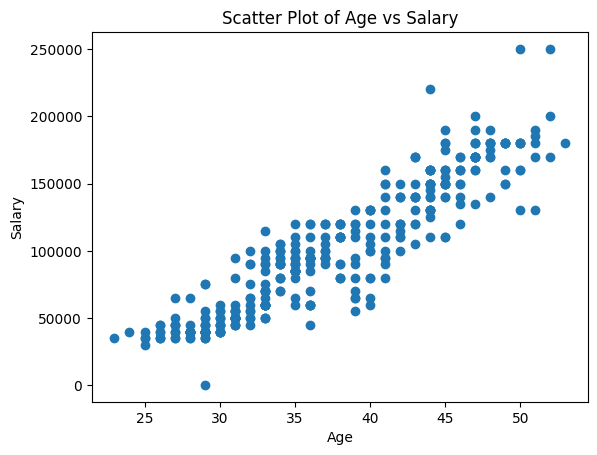

In [ ]:
plt.scatter(data['Age'], data['Salary'])
plt.xlabel('Age')
plt.ylabel('Salary')
plt.title('Scatter Plot of Age vs Salary')
plt.show()

<ipython-input-65-533c9cad2a60>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Salary'])


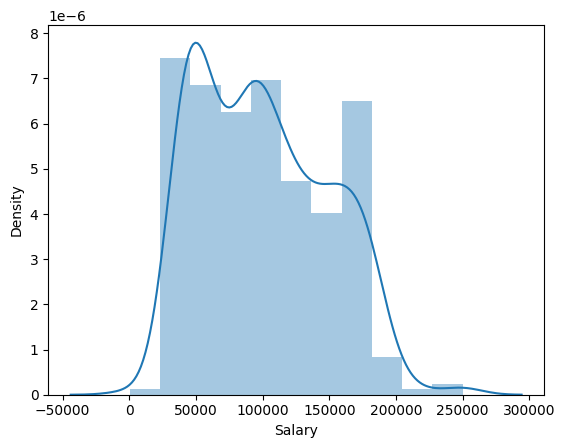

In [ ]:
import seaborn as sns
sns.distplot(data['Salary'])
plt.show()

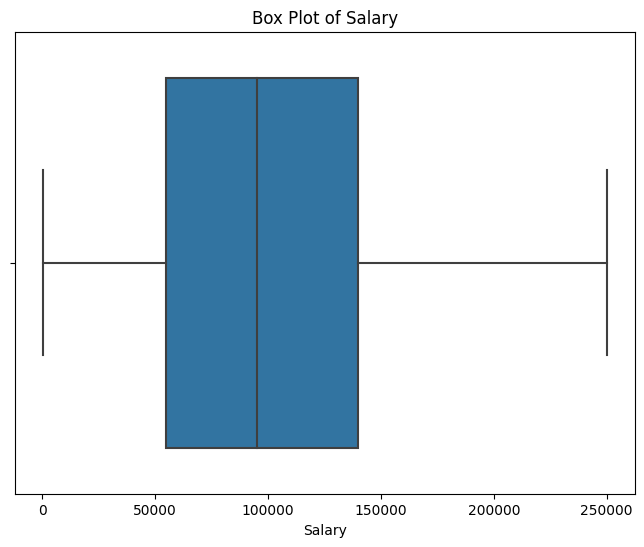

In [ ]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Salary', data=data)
plt.xlabel('Salary')
plt.title('Box Plot of Salary')
plt.show()

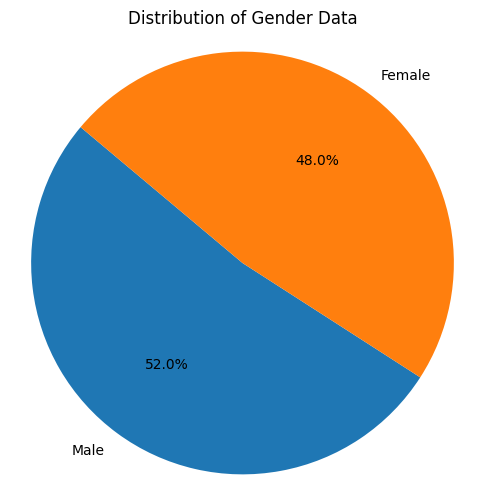

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
gender_counts = data['Gender'].value_counts()
plt.figure(figsize=(6, 6))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Gender Data')
plt.axis('equal')
plt.show()


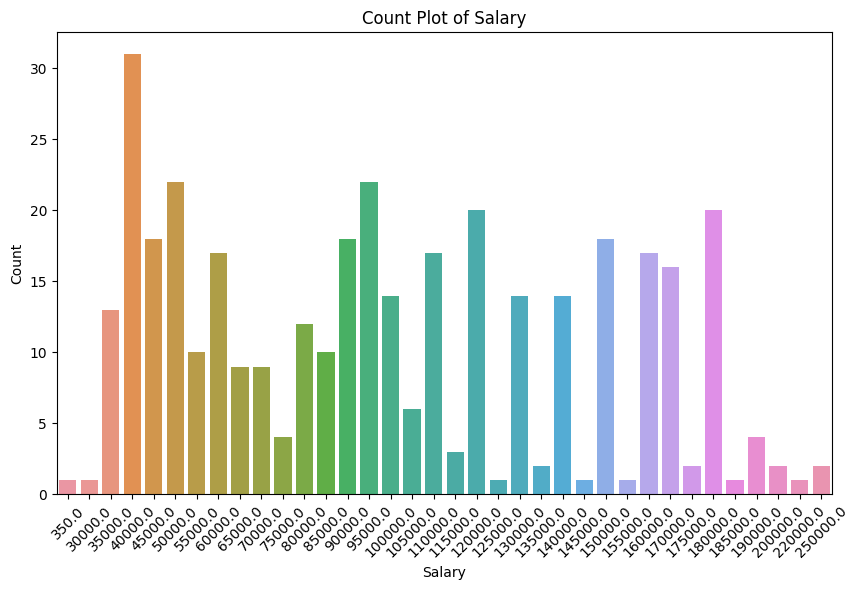

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='Salary')

plt.title('Count Plot of Salary')
plt.xlabel('Salary')
plt.ylabel('Count')

plt.xticks(rotation=45)
plt.show()

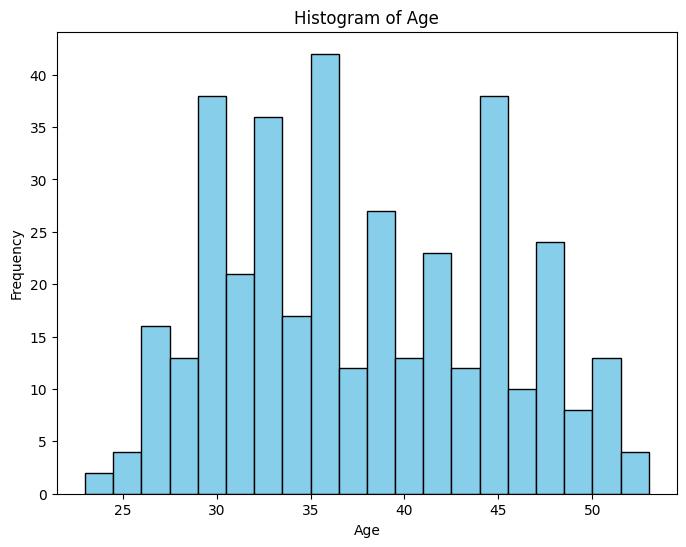

In [ ]:
plt.figure(figsize=(8, 6))
plt.hist(data['Age'], bins=20, color='skyblue', edgecolor='black')
plt.title('Histogram of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

**Data Scaling using minmax normalization**

In [ ]:
age_max=new_data['Age'].max()
age_min=new_data['Age'].min()
job_title_max=new_data['Job Title'].max()
job_title_min=new_data['Job Title'].min()

years_of_experience_max=new_data['Years of Experience'].max()
years_of_experience_min=new_data['Years of Experience'].min()
salary_max=new_data['Salary'].max()
salary_min=new_data['Salary'].min()
print(age_max,age_min,job_title_max,job_title_min,years_of_experience_max,years_of_experience_min,salary_max,salary_min)
new_data['Age'] = (new_data['Age']-new_data['Age'].min() )/ (new_data['Age'].max()-new_data['Age'].min())
new_data['Job Title'] = new_data['Job Title'] / (new_data['Job Title'].max()-new_data['Job Title'].min())
new_data['Years of Experience'] = (new_data['Years of Experience']-new_data['Years of Experience'].min() )/ (new_data['Years of Experience'].max()-new_data['Years of Experience'].min())
new_data['Salary'] = (new_data['Salary']-new_data['Salary'].min() )/ (new_data['Salary'].max()-new_data['Salary'].min())

53.0 23.0 173 0 25.0 0.0 250000.0 350.0


In [ ]:
new_data.head()

,Age,Job Title,Years of Experience,Salary,Female,Male,Bachelor's,Master's,PhD
0,0.300000,0.919075,0.20,0.359103,0,1,1,0,0
1,0.166667,0.098266,0.12,0.258963,1,0,0,1,0
2,0.733333,0.751445,0.60,0.599439,0,1,0,0,1
3,0.433333,0.583815,0.28,0.238935,1,0,1,0,0
4,0.966667,0.127168,0.80,0.799720,0,1,0,1,0
